#Sentiment Analysis on Tweets

**Author**: Jyoti Yadav

**Date**: Jan 2021

**Email**: jyoti.yadav@studio.unibo.it

#Introduction

The objective of this task is to detect hate speech in tweets.For the sake 
of simplicity, we say a tweet contains hate speech if it has a racist or 
sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.
Formally, given a training sample of tweets and labels, where label '1' 
denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.
This project is focused on comparing different text representations and learning models on a classification task.

We will work on a large supervised dataset of English tweet ([twitter-hate-speech](https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech)).We will focus on 4 text representation strategies:

1.   Bag-of-Words (BoW)
2.   TF-IDF
3.   Word2Vec (w2v)
4.   doc2vec (d2v)

3 classifiers:

1. Logistic Regression
2. Support Vector Machine
3. XGBoost





Finally taking the model based on best validation F1-Score we will FineTune them. It was observed that XGBoost + Word2Vec has given the best performance 
so far Let’s try to tune it further to extract as much from it as we can. XGBoost has quite a many tuning parameters and sometimes it becomes tricky to properly tune them.


Finally ,there will be a summary for the table showing F1 scores for different models and feature-sets.

#Project WorkFlow

*   Import Libraries
*   Tweets Preprocessing and Cleaning
    *   Data Inspection
    *   Data Cleaning
*   Visualization from Tweets
*   Extracting Features from Cleaned Tweets
    *   Bag-of-Words
    *   TF-IDF
    *   Word2Vec
    *   Doc2vec
*   Model Building: Sentiment Analysis
    *   Logistic Regression
    *   Support Vector Machine
    *   XGBoost
*   Model Fine-tuning
*   Summary

#Problem Statement

### What is sentimental analysis ?

Sentiment analysis (also known as opinion mining) is one of the many applications of Natural Language Processing. It is a set of methods and techniques used for extracting subjective information from text or speech, such as opinions or attitudes. In simple terms, it involves classifying a piece of text as positive, negative or neutral.


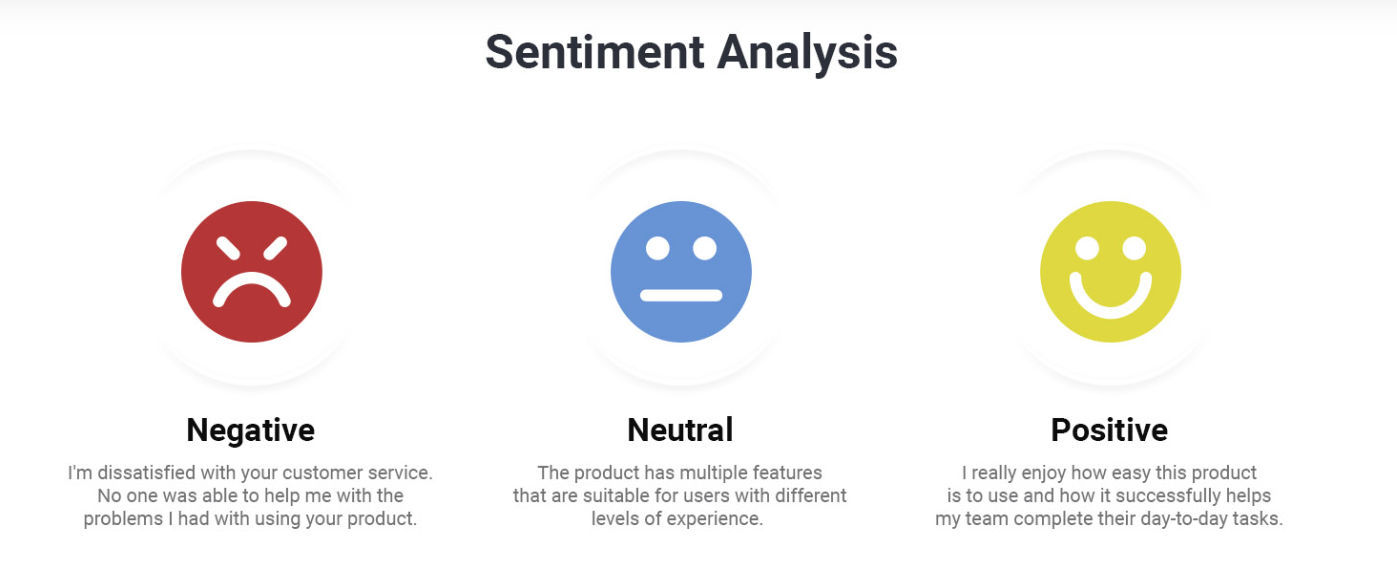




The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist the main objective is to predict the labels on the given test dataset.
For more information please visit  [practice problem twitter sentiment analysis](https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/#About)

###Import Libraries

In [ ]:
import re  
import nltk
import string 
import warnings
import gensim 
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn import svm
import matplotlib.pyplot as plt 
from nltk.stem.porter import * 
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from gensim.models.doc2vec import LabeledSentence
pd.set_option("display.max_colwidth", 200) 
from sklearn.naive_bayes import MultinomialNB
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
%matplotlib inline

### Read Input File

In [ ]:
train_url = 'https://raw.githubusercontent.com/jyotiyadav94/Text-Mining-Project/main/train.csv'
test_url = 'https://raw.githubusercontent.com/jyotiyadav94/Text-Mining-Project/main/test.csv'

train  = pd.read_csv(train_url)
test = pd.read_csv(test_url)

In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


Text is a highly unstructured form of data, various types of noise are present in it and the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as text preprocessing. We will divide it into 2 parts:

1. Data Inspection
2. Data Cleaning

## Data Inspection

In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [ ]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


Checking the dimensions of train and test data

In [ ]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [ ]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

checking few racist/sexist tweets.

In [ ]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


Checking non racist/sexist tweets.

In [ ]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


Printing percentage of tweets with non racist/sexist Tweet sentiments

In [ ]:
print('percentage of tweet labelled as a non racist/sexist tweet ',sum(train['label']==0)*100/train.shape[0])

percentage of tweet labelled as a non racist/sexist tweet  92.98542018647143


Printing percentage of tweets with racist/sexist Tweet sentiments

In [ ]:
print('percentage of tweet labelled as a racist/sexist tweet: ',sum(train['label']==1)*100/train.shape[0])

percentage of tweet labelled as a racist/sexist tweet:  7.014579813528565


Let's look at the distribution of non racist/sexist vs racist/sexist Tweet Sentiments

Text(0, 0.5, 'Count')

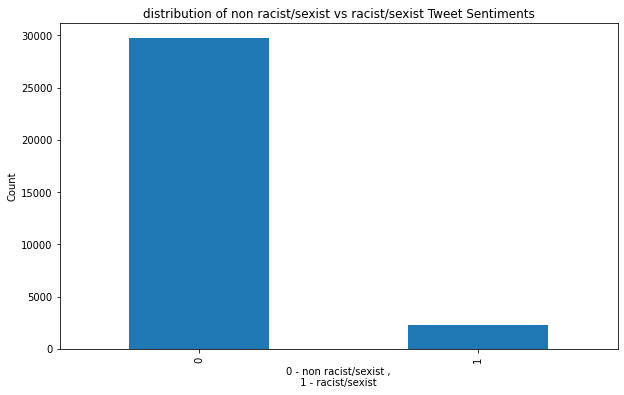

In [ ]:
ax=train['label'].value_counts().plot(kind='bar',figsize=(10,6),title="distribution of non racist/sexist vs racist/sexist Tweet Sentiments")
ax.set_xlabel("0 - non racist/sexist ,\n 1 - racist/sexist ")
ax.set_ylabel("Count")

It was observed from the bars and the percentage above shows that approximately 93% of the tweets are non racist whereas 7% are racist. Hence we can infer that the dataset is imbalanced. We will use weighted F1 score to analyse our models.

In any natural language processing task, cleaning raw text data is an important step. It helps in getting rid of the unwanted words and characters which helps in obtaining better features. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

Before begining cleaning, let’s first combine train and test datasets. Combining the datasets will make it convenient for us to preprocess the data. Later we will split it back into train and test data.

In [ ]:
combine=train.append(test,ignore_index=True,sort=True)

#Preprocessing

We will be using the below following steps below to clean the raw tweets in out data.

1. **Removing unwanted words** - We will remove the twitter handles as they are already masked as @user due to privacy concerns. These twitter handles hardly give any information about the nature of the tweet.

2. **Removing Punctuations, Numbers, and Special Characters** - We will also get rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different types of tweets.

3. **Removing short/stop words** - Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.

4. **Normalizing and Stemming** - Lastly, we will normalize the text data. For example, reducing terms like loves, loving, and lovable to their base word, i.e., ‘love’.are often used in the same context. If we can reduce them to their root word, which is ‘love’. It will help in reducing the total number of unique words in our data without losing a significant amount of information.

###1. Removing Twitter Handles (@user)

Let’s create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that we have passed “@[]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [ ]:
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*") 
combine.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so #gr8 !


###2. Removing Punctuations, Numbers, and Special Characters

replacing everything except characters and hashtags with spaces. The regular expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.

In [ ]:
combine.tidy_tweet = combine.tidy_tweet.str.replace("[^a-zA-Z#]", " ")
combine.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


###3. Removing Short Words

Removing all the words which have the length 3 or less. For example terms like 'hmm' ,'oh' are of very little use.Its better to get rid of them.

In [ ]:
combine.tidy_tweet = combine.tidy_tweet.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
combine.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talking before they leave chaos disputes when they there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here


###4. Text Normalization

Let's use nltk’s PorterStemmer() function to normalize the tweets. But before that let's tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [ ]:
tokenized_tweet = combine.tidy_tweet.apply(lambda x: x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

### Now we can normalize the tokenized tweets.

In [ ]:
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

 Now let’s stitch these tokens back together

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combine['tidy_tweet'] = tokenized_tweet
combine.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talk befor they leav chao disput when they there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camp tomorrow danni
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land #allin #cav #champion #cleveland #clevelandcavali
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcom here


In this section, let's  explore the cleaned tweets. Exploring and visualizing data, no matter whether its text or any other data, is an essential step in gaining insights. 

*   What are the most common words in the entire dataset?
*   What are the most common words in the dataset for non racist/sexist and racist/sexist tweets, respectively?
*   How many hashtags are there in a tweet?
*   Which trends are associated with my dataset?
*   Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

### A) Understanding the common words used in the tweets: WordCloud

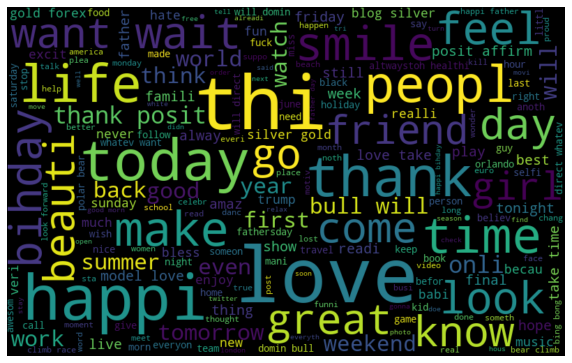

In [ ]:
all_words = ' '.join([text for text in combine['tidy_tweet']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

### B) Words in non racist/sexist tweets

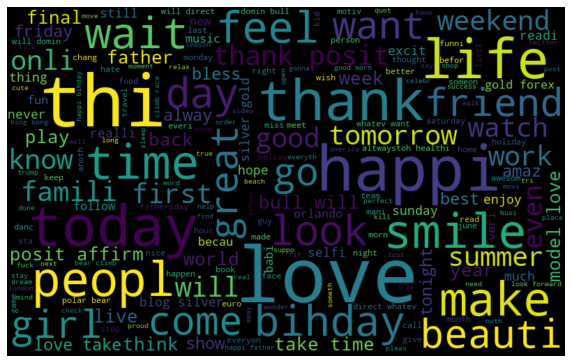

In [ ]:
normal_words =' '.join([text for text in combine['tidy_tweet'][combine['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

### C) Racist/Sexist Tweets

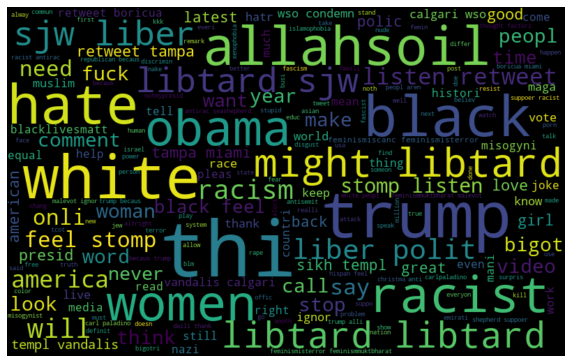

In [ ]:
negative_words = ' '.join([text for text in combine['tidy_tweet'][combine['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

### D) Understanding the impact of Hashtags on tweets sentiment

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

For instance, given below is a tweet from our dataset:

**"What has today's attitude to womengot in common with that of norman bates? #psycho #feminism #hollaback"**

The tweet seems sexist in nature and the hashtags in the tweet convey the same feeling.

let's store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

function to collect hashtags 

In [ ]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

extracting hashtags from non racist/sexist tweets 

In [ ]:
HT_regular = hashtag_extract(combine['tidy_tweet'][combine['label'] == 0])

extracting hashtags from racist/sexist tweets

In [ ]:
HT_negative = hashtag_extract(combine['tidy_tweet'][combine['label'] == 1])

In [ ]:
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

Let's plot the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

###Non-Racist/Sexist Tweets

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
) 

selecting top 20 most frequent hashtags

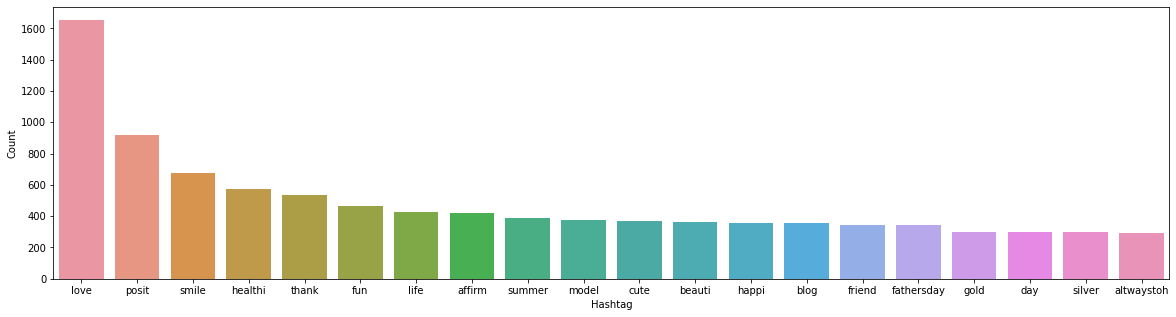

In [ ]:
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list. Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

###Racist/Sexist Tweets

In [ ]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
) 

selecting top 20 most frequent hashtags


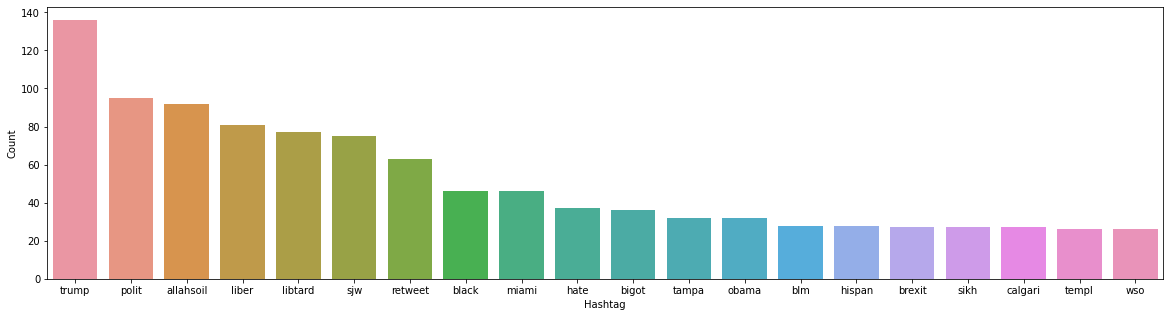

In [ ]:
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

##Bag of words Features

To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings. Read on to understand these techniques in detail.


Let’s start with the **Bag-of-Words** Features.

Consider a Corpus C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a dictionary and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

Let us understand this using a simple example.

D1: He is a lazy boy. She is also lazy.

D2: Smith is a lazy person.

The dictionary created would be a list of unique tokens in the corpus =['H','She','lazy','boy','Smith','person']

Here, D=2, N=6

The matrix M of size 2 X 6 will be represented as –

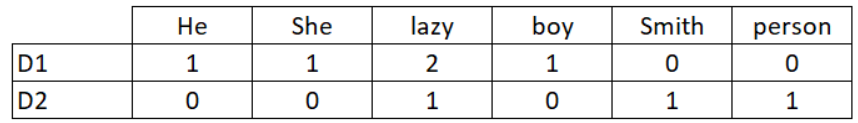


Now the columns in the above matrix can be used as features to build a classification model.

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combine['tidy_tweet'])
bow.shape

(49159, 1000)

##TFIDF

This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to **TF-IDF**:

TF = (Number of repetitions of word in a document) / (No of words in a document)

IDF =Log[(Number of documents) / (Number of documents containing the word)]

TF-IDF = TF*IDF

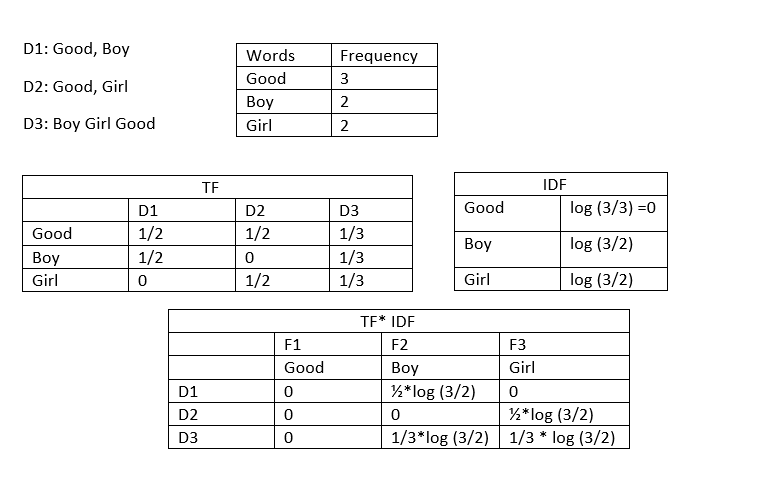

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combine['tidy_tweet'])
tfidf.shape

(49159, 1000)

###Word2Vec Features

Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are able to achieve tasks like King -man +woman = Queen, which is mind-blowing.

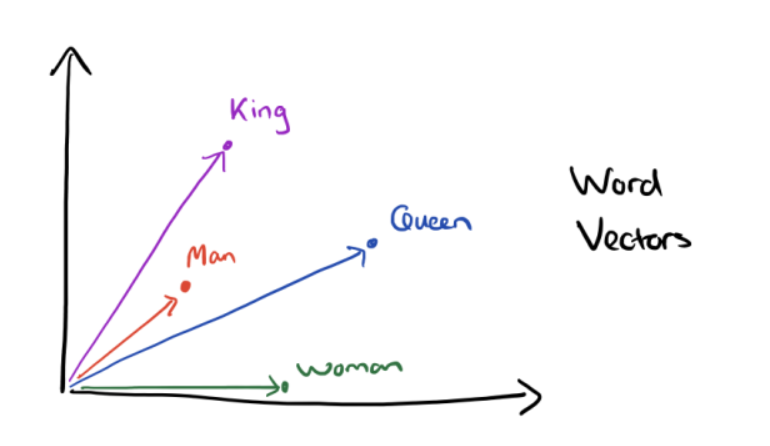


The advantages of using word embeddings over BOW or TF-IDF are:

1. Dimensionality reduction - significant reduction in the no. of features required to build a model.

2. It capture meanings of the words, semantic relationships and the different types of contexts they are used in.


Word2Vec Embeddings

Word2Vec model takes a text corpus as input and produces the word embedding vectors as output.Word2Vec is not a single algorithm but a combination of two techniques 

* CBOW (Continuous bag of words)
* Skip-gram model 

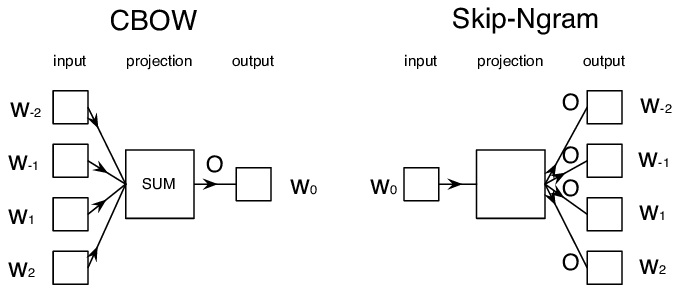


Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.

CBOW tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words. The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.

Below is a diagrammatic representation of a Word2Vec model.

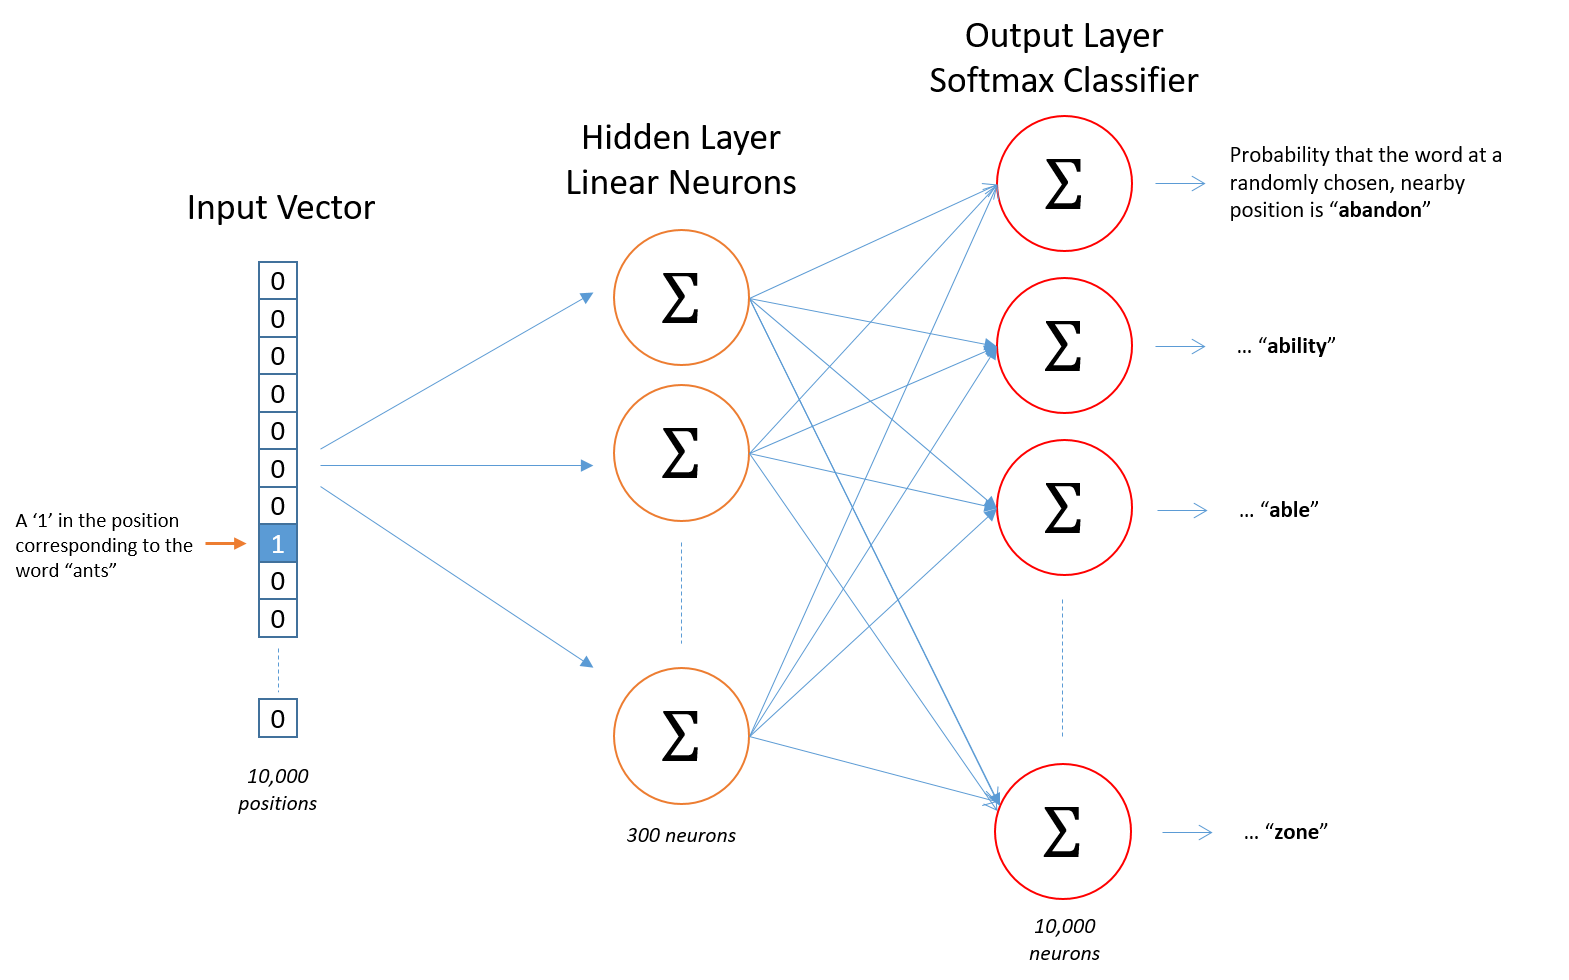
There are three laters: - an input layer, - a hidden layer, and - an output layer.

The input layer and the output, both are one- hot encoded of size [1 X V], where V is the size of the vocabulary (no. of unique words in the corpus). The output layer is a softmax layer which is used to sum the probabilities obtained in the output layer to 1. The weights learned by the model are then used as the word-vectors.

We will go ahead with the Skip-gram model as it has the following advantages:

It can capture two semantics for a single word. i.e it will have two vector representations of ‘apple’. One for the company Apple and the other for the fruit.

Skip-gram with negative sub-sampling outperforms CBOW generally.

We will train a Word2Vec model on our data to obtain vector representations for all the unique words present in our corpus. There is one more option of using pre-trained word vectors instead of training our own model. Some of the freely available pre-trained vectors are:

* Google News Word Vectors

* Freebase names

* DBPedia vectors (wiki2vec)

However, for now, we will train our own word vectors since size of the pre-trained word vectors is generally huge.

In [ ]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
)
model_w2v.train(tokenized_tweet, total_examples= len(combine['tidy_tweet']), epochs=20)

(6511187, 7536020)

Let's look at the most similar words from the corpus

In [ ]:
model_w2v.wv.most_similar(positive="dinner")

[('#avocado', 0.5651944875717163),
 ('spaghetti', 0.5598152875900269),
 ('cookout', 0.5590797066688538),
 ('missu', 0.5445502996444702),
 ('dess', 0.5439169406890869),
 ('#foodcoma', 0.5432044267654419),
 ('#cellar', 0.5426316857337952),
 ('reggio', 0.5342167019844055),
 ('aladdin', 0.5340277552604675),
 ('#biall', 0.5331082344055176)]

In [ ]:
model_w2v.most_similar(positive="trump")

[('donald', 0.5649505853652954),
 ('unstabl', 0.5574066638946533),
 ('#delegaterevolt', 0.5436158776283264),
 ('tomlin', 0.5374214053153992),
 ('jibe', 0.5324555039405823),
 ('melo', 0.5323482155799866),
 ('nomine', 0.5315824747085571),
 ('hillari', 0.526566207408905),
 ('phoni', 0.5244182348251343),
 ('unfit', 0.5205065608024597)]

From the above two examples, we can see that our word2vec model does a good job of finding the most similar words for a given word. But how is it able to do so? That’s because it has learned vectors for every unique word in our data and it uses cosine similarity to find out the most similar vectors (words).

Let’s check the vector representation of any word from our corpus.

In [ ]:
len(model_w2v['food'])

200

### Preparing vectors for tweet

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

###Preparing word2vec feature set

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

###2. Doc2Vec Embedding

Doc2Vec model is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents. This approach is an extension of the word2vec. The major difference between the two is that doc2vec provides an additional context which is unique for every document in the corpus. This additional context is nothing but another feature vector for the whole document. This document vector is trained along with the word vectors.

To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. We can do so by using Gensim’s LabeledSentence() function.

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets

Now let’s train a doc2vec model

In [ ]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm_mean = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 5.                                  
                                  workers=32, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23, # for reproducibility
                                 ) 
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples= len(combine['tidy_tweet']), epochs=15)

100%|██████████| 49159/49159 [00:00<00:00, 2023512.11it/s]


### doc2vec Feature Set

In [ ]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combine)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    
docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

1. Logistic Regression
2. Support Vector Machine
4. XGBoost

Evaluation Metric

F1 score is being used as the evaluation metric. It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is suitable for uneven class distribution problems.

The important components of F1 score are:

1. True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.
2. True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.
3. False Positives (FP) – When actual class is no and predicted class is yes.
4. False Negatives (FN) – When actual class is yes but predicted class in no.

Precision = TP/TP+FP

Recall = TP/TP+FN


F1 Score = 2(Recall * Precision) / (Recall + Precision)

#Logistic Regression

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as the dependent variable. In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function.

A typical logistic model plot is shown below. You can see probability never goes below 0 and above 1.

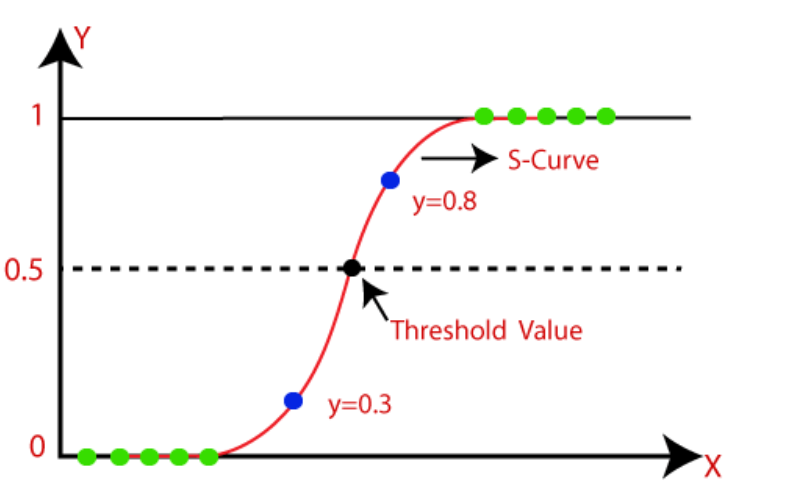

###Bag of words

In [ ]:
# Extracting train and test BoW features 
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 

# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression(solver='lbfgs') 

# training the model 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5303408146300915

### TF-IDF Features

In [ ]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:] 

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain) 

prediction = lreg.predict_proba(xvalid_tfidf)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int) 

f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5451327433628319

### Word2Vec Features

In [ ]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

lreg.fit(xtrain_w2v, ytrain) 

prediction = lreg.predict_proba(xvalid_w2v)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.6056547619047619

### Doc2Vec Features

In [ ]:
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:] 

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

lreg.fit(xtrain_d2v, ytrain) 

prediction = lreg.predict_proba(xvalid_d2v)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.34720992028343667

Doc2Vec features do not seem to be capturing the right signals as the F1-score on validation set is quite low.

#Support Vector Machine

Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is the number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes as shown in the plot below:

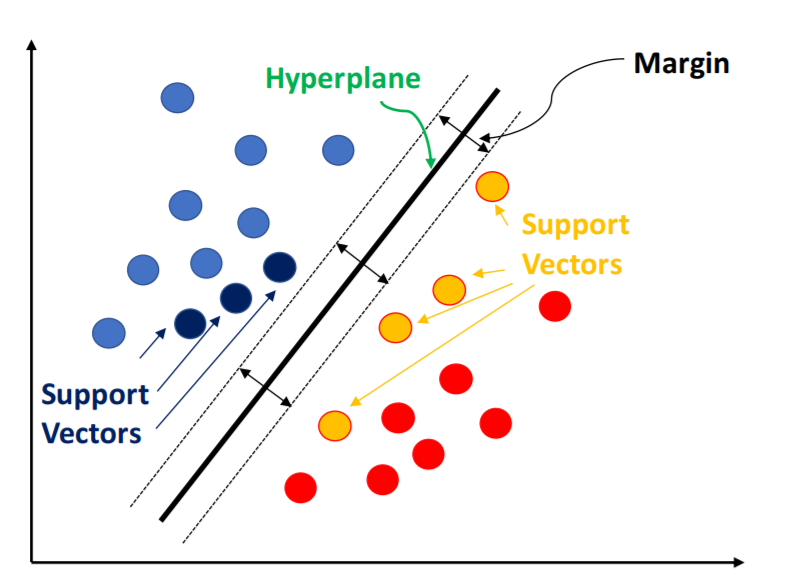

### Bag of words

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5088536812674744

### TF-IDF Features

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5127272727272728

### Word2Vec Features

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6062992125984252

### Doc2Vec Features

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain) 
prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.1798816568047337

#XGBoost

Extreme Gradient Boosting (xgboost) is an advanced implementation of gradient boosting algorithm. It has both linear model solver and tree learning algorithms. Its ability to do parallel computation on a single machine makes it extremely fast. It also has additional features for doing cross validation and finding important variables. There are many parameters which need to be controlled to optimize the model.

Some key benefits of XGBoost are:

* Regularization - helps in reducing overfitting

* Parallel Processing - XGBoost implements parallel processing and is blazingly faster as compared to GBM.

* Handling Missing Values - It has an in-built routine to handle missing values.

Built-in Cross-Validation - allows user to run a cross-validation at each iteration of the boosting process

### Bag-of-Words Features

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5130687318489837

### TF-IDF Features

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5185891325071497

### Word2Vec Features

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.6425992779783394

### Doc2Vec Features

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain) 
prediction = xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.35400225479143177

# FineTuning XGBoost + Word2Vec

In [ ]:
import xgboost as xgb
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)

# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

In [ ]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

General Approach for Parameter Tuning

We will follow the steps below to tune the parameters.

1. Choose a relatively high learning rate. Usually a learning rate of 0.3 is used at this stage.

2. Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.

3. Tune the learning rate.

4. Finally tune gamma to avoid overfitting.

Tuning max_depth and min_child_weight

In [ ]:
#Takes high time to run

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
    for min_child_weight in range(5,8)
    ]

max_f1 = 0. # initializing with 0 

best_params = None 

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(max_depth,min_child_weight))
    
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

     # Cross-validation
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
        )     
    
# Finding best F1 Score    
mean_f1 = cv_results['test-f1_score-mean'].max()
boost_rounds = cv_results['test-f1_score-mean'].idxmax()    
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    

if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight) 
        
print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5
CV with max_depth=6, min_child_weight=6
CV with max_depth=6, min_child_weight=7
CV with max_depth=7, min_child_weight=5
CV with max_depth=7, min_child_weight=6
CV with max_depth=7, min_child_weight=7
CV with max_depth=8, min_child_weight=5
CV with max_depth=8, min_child_weight=6
CV with max_depth=8, min_child_weight=7
CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
	F1 Score 0.6766347999999999 for 46 rounds
Best params: 9, 7, F1 Score: 0.6766347999999999


###Updating max_depth and min_child_weight parameters.

In [ ]:
params['max_depth'] = 9 
params['min_child_weight'] = 7

### Tuning subsample and colsample

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)]
]

max_f1 = 0. 
best_params = None 

for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(subsample,colsample))
    
    # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
        )
    
    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].idxmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5
	F1 Score 0.6631734 for 60 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.6631734 for 60 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.6631734 for 60 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.6631734 for 60 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.6631734 for 60 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.6423038 for 33 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.6423038 for 33 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.6423038 for 33 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.6423038 for 33 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.6423038 for 33 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.670655 for 48 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.670655 for 48 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.670655 for 48 rounds
CV with subsample=0.7, colsample=0.8
	F1 Score 0.670655 for 48 rounds
CV with su

### Updating subsample and colsample_bytree

In [ ]:
params['subsample'] = 0.7
params['colsample_bytree'] = 0.5

### Now let’s tune the learning rate.

In [ ]:
max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta

     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].idxmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
        
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3
	F1 Score 0.6675646000000001 for 36 rounds
CV with eta=0.2
	F1 Score 0.6704559999999999 for 74 rounds
CV with eta=0.1
	F1 Score 0.6879294 for 126 rounds
CV with eta=0.05
	F1 Score 0.6880483999999999 for 167 rounds
CV with eta=0.01
	F1 Score 0.1302024 for 0 rounds
CV with eta=0.005
	F1 Score 0.1302024 for 0 rounds
Best params: 0.05, F1 Score: 0.6880483999999999


### Let’s have a look at the final list of tuned parameters.

In [ ]:
params = {
    'colsample': 0.9,
    'colsample_bytree': 0.5,
    'eta': 0.1,
    'max_depth': 9,
    'min_child_weight': 7,
    'objective': 'binary:logistic',
    'subsample': 0.9
}

Finally we can now use these tuned parameters in our xgboost model. We have used early stopping of 10 which means if the model’s performance doesn’t improve under 10 rounds, then the model training will be stopped.

In [ ]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
 )

[0]	Validation-error:0.06497	Validation-f1_score:0.133165
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.059026	Validation-f1_score:0.133165
[2]	Validation-error:0.055585	Validation-f1_score:0.133165
[3]	Validation-error:0.055063	Validation-f1_score:0.133165
[4]	Validation-error:0.054959	Validation-f1_score:0.133165
[5]	Validation-error:0.055063	Validation-f1_score:0.371313
[6]	Validation-error:0.053395	Validation-f1_score:0.467941
[7]	Validation-error:0.053395	Validation-f1_score:0.524873
[8]	Validation-error:0.052977	Validation-f1_score:0.56032
[9]	Validation-error:0.051726	Validation-f1_score:0.583123
[10]	Validation-error:0.051309	Validation-f1_score:0.588779
[11]	Validation-error:0.052039	Validation-f1_score:0.597952
[12]	Validation-error:0.050579	Validation-f1_score:0.60014
[13]	Validation-error:0.05183	Validation-f1_score:0.60274
[14]	Validat

### Final Prediction

In [ ]:
test_pred = xgb_model.predict(dtest)
test['label'] = (test_pred >= 0.3).astype(np.int)
# custom_eval(test_pred,dtest)

Below is a summary table showing F1 scores for different models and feature-sets.

Word2Vec features turned out to be most useful. Whereas XGBoost with Word2Vec features was the best model for this problem. This clearly shows the power of word embeddings in dealing with NLP problems.

### Validation F1 score

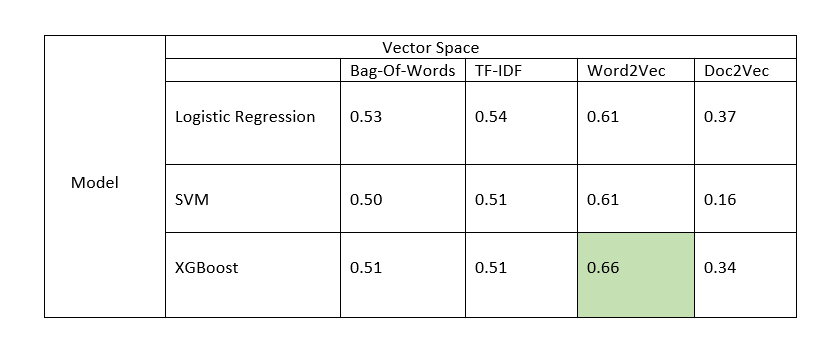